
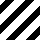
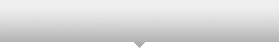
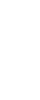
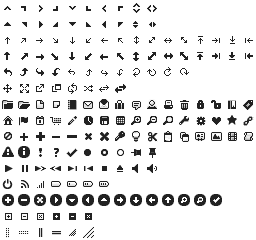
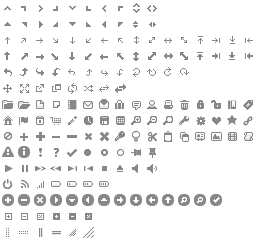
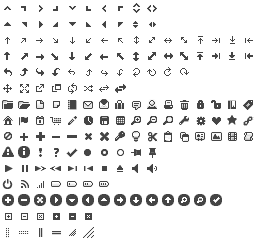
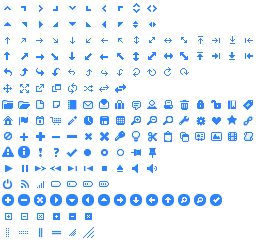
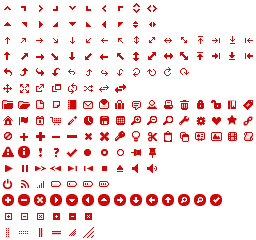
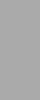
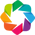
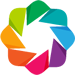
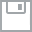
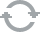
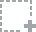
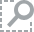
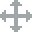
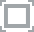
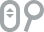

In [1]:
import pandas as pd
from bokeh.plotting import show, output_notebook
output_notebook()

#### Here we build the visualization up to the point where we need the server

### Get the data

In [2]:
# You can see how this was made in the map_data.py under washmap/washmap

data = pd.read_hdf('static_map_data.hdf', 'df')  # note we have to use hdf, not csv for the xs & ys lists
data.head()

name                                                 xs  \
0       Algeria  [11.9995056495, 8.57289310063, 5.67756595218, ...   
1        Angola  [16.3265283546, 16.5731799659, 16.8601908708, ...   
2         Benin  [2.69170169436, 1.86524051271, 1.61895063641, ...   
3      Botswana  [25.6491634458, 25.8503914731, 26.1647908872, ...   
4  Burkina Faso  [-2.82749630371, -3.51189897299, -3.9804491845...   

                                                  ys  country_id wat_value  \
0  [23.4716684026, 21.5656607122, 19.6012069768, ...          36         -   
1  [-5.87747039147, -6.62264454512, -7.2222978654...          18         -   
2  [6.25881724693, 6.14215770103, 6.83203807213, ...          48      57.1   
3  [-18.5360258928, -18.7144129371, -19.293085625...          42      91.9   
4  [9.64246084232, 9.90032623946, 9.86234406172, ...           1      43.6   

  san_value wat_color san_color  year  
0         -   #CCCCCC   #CCCCCC  1990  
1         -   #CCCCCC   #CCCCCC  1990  
2       5.0   #62abc7   #d45500  1990  
3      38.6   #3fc0f0   #eb941f  1990  
4       7.7   #6aa6bd   #d45500  1990

### Make a plot

In [3]:
from bokeh.models import Plot, Range1d
from chart_constants import PLOT_FORMATS

x_range = Range1d(0, 250)
y_range = Range1d(0, 120)

text_box = Plot(
    x_range=x_range, y_range=y_range, title="", 
    plot_width=250, plot_height=120, min_border=0, 
    **PLOT_FORMATS
)  

### Add some simple glyphs

In [4]:
from bokeh.models import Text, Rect, Triangle
from chart_constants import FONT_PROPS_SM, BLUE, ORANGE, ORANGE_SHADOW

text_box.add_glyph(
    Text(x=95, y=20, text=['of people had'],  **FONT_PROPS_SM)
)
text_box.add_glyph(
    Text(x=95, y=5, text=['access in'], **FONT_PROPS_SM)
)
text_box.add_glyph(
    Rect(x=75, y=55, width=200, height=5, 
         fill_color=BLUE, line_color=None)
)
text_box.add_glyph(
    Triangle(x=150, y=65, size=25, 
             fill_color=ORANGE_SHADOW, line_color=None)
)
text_box.add_glyph(
    Rect(x=200, y=60, width=100, height=40, 
         fill_color=ORANGE, line_color=None)
)
show(text_box)

## Making a map

In [5]:
def setup_map_plot():
    x_start, x_end = (-20, 60)
    y_start, y_end = (-40, 40)
    aspect_ratio = (x_end - x_start) / (y_end - y_start)
    x_range = Range1d(x_start, x_end)
    y_range = Range1d(y_start, y_end)
    plot_height = 400    
    return Plot(x_range=x_range, y_range=y_range, title="", plot_width=int(plot_height * aspect_ratio), plot_height=plot_height, **PLOT_FORMATS)

### Make a source

In [6]:
from bokeh.models import ColumnDataSource

source = ColumnDataSource(data)
data[['xs', 'ys', 'wat_color']].head(3)

xs  \
0  [11.9995056495, 8.57289310063, 5.67756595218, ...   
1  [16.3265283546, 16.5731799659, 16.8601908708, ...   
2  [2.69170169436, 1.86524051271, 1.61895063641, ...   

                                                  ys wat_color  
0  [23.4716684026, 21.5656607122, 19.6012069768, ...   #CCCCCC  
1  [-5.87747039147, -6.62264454512, -7.2222978654...   #CCCCCC  
2  [6.25881724693, 6.14215770103, 6.83203807213, ...   #62abc7

### Add glyph linked to data

In [7]:
from bokeh.models import Patches

countries = Patches(
    xs='xs', 
    ys='ys',
    fill_color='wat_color', 
    line_color="#FFFFFF", 
)
map_box = setup_map_plot()
map_box.add_glyph(ColumnDataSource(data), countries)
show(map_box)

### Add the tap tool

In [8]:
from bokeh.models import TapTool

map_box = setup_map_plot()
map_box.add_glyph(ColumnDataSource(data), countries)
map_box.add_tools(TapTool())
show(map_box)

### Make selection style correctly

In [9]:
selected_countries = Patches(
    xs='xs', 
    ys='ys',
    fill_color='wat_color', 
    line_color=ORANGE, 
    line_width=5,
)

map_box = setup_map_plot()
map_box.add_glyph(ColumnDataSource(data), countries, selection_glyph=selected_countries, nonselection_glyph=countries)
map_box.add_tools(TapTool())
show(map_box)

### Try playing with setting up new sources

You may want to try specifying the same source for each of the above three plots.

### Add hover tool

Note that in the washmap app we add extra html and then style it

In [10]:
from bokeh.models import HoverTool

map_box = setup_map_plot()
map_box.add_glyph(ColumnDataSource(data), countries, selection_glyph=selected_countries, nonselection_glyph=countries)
map_box.add_tools(TapTool())
map_box.add_tools(HoverTool(tooltips="@year<br />@name<br />@wat_value %"))
show(map_box)

In [28]:
def make_map(source, fill_color_string='wat_color', value_string='wat_value'):
    
    countries = Patches(
        xs='xs', 
        ys='ys',
        fill_color=fill_color_string, 
        line_color="#FFFFFF", 
    )
    selected_countries = Patches(
        xs='xs', 
        ys='ys',
        fill_color=fill_color_string, 
        line_color=ORANGE, 
        line_width=5,
    )
    map_box = setup_map_plot()
    map_box.add_glyph(source, countries, selection_glyph=selected_countries, nonselection_glyph=countries)
    map_box.add_tools(TapTool())
    tooltips = "@year<br />@name<br />@" + value_string + " %"
    map_box.add_tools(HoverTool(tooltips=tooltips))
    return map_box



### Make the text box and have it accept a source

In [29]:
from bokeh.models import Text
from chart_constants import FONT_PROPS_SM, FONT_PROPS_MD, FONT_PROPS_LG

def construct_text_box(source, value_string, color_string, bar_color): 
    # Plot and axes                                                             
    xdr = Range1d(0, 220)                                                       
    ydr = Range1d(0, 120)                                                       
                                                                                
    plot = Plot(                                                                
        x_range=xdr,                                                            
        y_range=ydr,                                                            
        title="",                                                               
        plot_width=250,                                                         
        plot_height=120,                                                        
        min_border=0,                                                           
        **PLOT_FORMATS                                                          
    )                                                                           
    # Add the writing                                                           
    country = Text(x=5, y=50, text='name', **FONT_PROPS_MD)                     
    percent = Text(x=15, y=10, text=value_string, text_color=color_string, **FONT_PROPS_LG)  # nopep8
    percent_sign = Text(x=69, y=10, text=['%'], text_color=color_string, **FONT_PROPS_LG)  # nopep8
    line_one = Text(x=90, y=28, text=['of people had'], **FONT_PROPS_SM)        
    line_two_p1 = Text(x=90, y=14, text=['access in'], **FONT_PROPS_SM)         
    line_two_p2 = Text(x=136, y=14, text='year', **FONT_PROPS_SM)               
    plot.add_glyph(source, Text(), selection_glyph=country)                     
    plot.add_glyph(source, Text(), selection_glyph=percent)                     
    plot.add_glyph(source, Text(), selection_glyph=percent_sign)                
    plot.add_glyph(line_one)                                                    
    plot.add_glyph(line_two_p1)                                                 
    plot.add_glyph(source, Text(), selection_glyph=line_two_p2)                 
                                                                                
    # Add the orange box with year                                              
    shadow = Triangle(x=150, y=109, size=25, fill_color=ORANGE_SHADOW, line_color=None)  # nopep8
    plot.add_glyph(shadow)                                                      
    # Add the blue bar                                                          
    rect = Rect(x=75, y=99, width=150, height=5, fill_color=bar_color, line_color=None)  # nopep8
    plot.add_glyph(rect)                                                        
    box = Rect(x=200, y=100, width=100, height=40, fill_color=ORANGE, line_color=None)  # nopep8
    plot.add_glyph(box)                                                         
    year = Text(x=160, y=85, text='year', text_font_size='18pt', text_color="#FFFFF", text_font_style="bold")  # nopep8
    plot.add_glyph(source, Text(), selection_glyph=year)                        
                                                                                
    return plot   

show(construct_text_box(source, 'wat_value', 'wat_color', BLUE))

### Construct map and text box with same source

If you click on a country it will update the text

In [30]:
from bokeh.plotting import hplot, vplot

source = ColumnDataSource(data)

map_plot = make_map(source)
text_box = construct_text_box(source, 'wat_value', 'wat_color', BLUE)

show(hplot(vplot(map_plot), vplot(text_box)))

### Use widgets to make water & sanitation

In [34]:
from bokeh.models.widgets import Tabs, Panel
from chart_constants import GREEN

# Select a country by default
source = ColumnDataSource(data)
source.selected = [30]

water_plot = make_map(source, 'wat_color', 'wat_value')
water_text = construct_text_box(source, 'wat_value', 'wat_color', BLUE)
sanitation_plot = make_map(source, 'san_color', 'san_value')
sanitation_text = construct_text_box(source, 'san_value', 'san_color', GREEN)


tabs = Tabs(tabs=[
        Panel(title="Water", child=hplot(vplot(water_plot), vplot(water_text))),
        Panel(title="Sanitation", child=hplot(vplot(sanitation_plot), vplot(sanitation_text)))
    ])

show(vplot(tabs))